<a href="https://colab.research.google.com/github/Andrian17/Python-Face-Recognition/blob/main/pcd4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mengimport library yang digunakan.

In [111]:
import cv2
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

Pada Tugas ini saya akan mendeteksi gambar berikut :





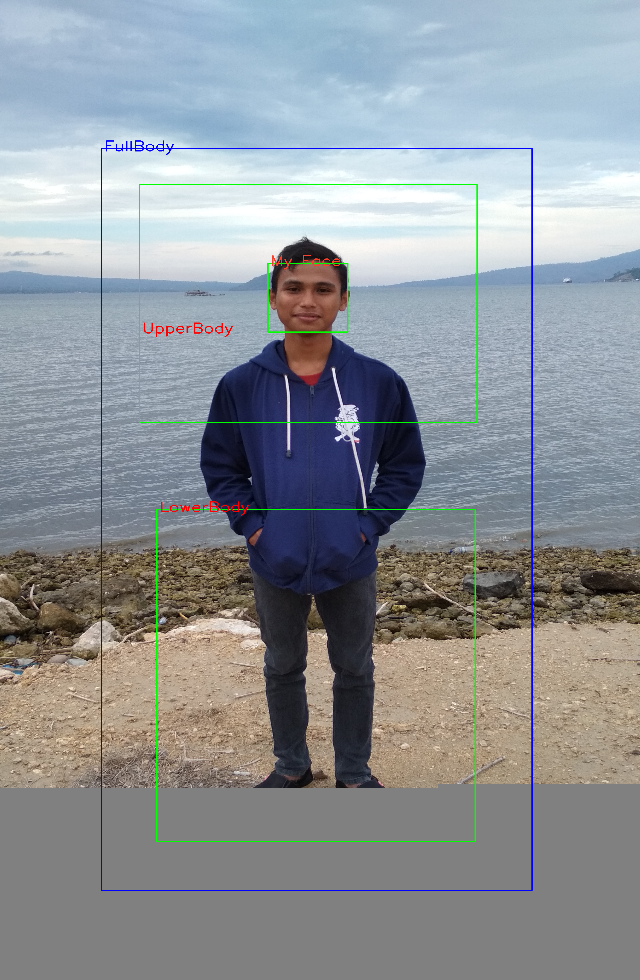

In [112]:
img = cv2.imread("me-3.jpg")

# print(img)
# haarcascade
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
fullBodyCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_fullbody.xml")
upperBodyCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_upperbody.xml")
lowerBodyCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_lowerbody.xml")
lowerBodyCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_lowerbody.xml")
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fullBodys = fullBodyCascade.detectMultiScale(gray, 1.3, 4)
# print(fullBodys)
for (x,y,w,h) in fullBodys :
  cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 4)
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  cv2.putText(img, "FullBody", (x+10, y+10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3)
  upperBodys = upperBodyCascade.detectMultiScale(roi_gray, 1.1, 3)
  # print(upperBodys)
  for (ux, uy, uw, uh) in upperBodys :
    cv2.rectangle(roi_color, (ux,uy), (ux+uw, uy+uh), (0,255,0), 4)
    cv2.putText(roi_color, "UpperBody", (ux+10, uy+y), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 3)

  # Face
  faces = faceCascade.detectMultiScale(roi_gray, 1.3, 4)
  for (fx, fy, fw, fh) in faces :
    cv2.rectangle(roi_color, (fx,fy), (fx+fw, fy+fh), (0,255,0), 4)
    cv2.putText(roi_color, "My Face", (fx+10, fy+10), cv2.FONT_HERSHEY_SIMPLEX, 2, (45,65,247), 3)
    # Eye
    # eyes = eyeCascade.detectMultiScale(roi_gray, 1.3, 5)
    # print(eyes)
    # for (ex, ey, ew, eh) in eyes :
    #   cv2.rectangle(roi_color, (fx,fy), (ex+ew, ey+eh), (0,0,255), 4)
    #   cv2.putText(roi_color, "My Eye", (ex+10, ey+5), cv2.FONT_HERSHEY_SIMPLEX, 2, (45,65,247), 3)

  lowerBodys = lowerBodyCascade.detectMultiScale(roi_gray, 1.1, 3)
  # print(lowerBodys)
  for (lx, ly, lw, lh) in lowerBodys :
    cv2.rectangle(roi_color, (lx,ly), (lx+lw, ly+lh), (0,255,0), 4)
    cv2.putText(roi_color, "LowerBody", (lx+10, ly+10), cv2.FONT_HERSHEY_SIMPLEX, 2, (0,0,255), 3)
img = cv2.resize(img, (640, 980))
cv2_imshow(img)